In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

In [2]:
planetNames = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
planetPosition = {}
planetVelocity = {}
planetDistance = {}
for i in range(8):
    df = pd.read_csv(f"Data\\planetPositions\\{planetNames[i]}.csv", header=None)
    array = np.array(df)
    planetPosition[planetNames[i]] = array[1:]
    planetVelocity[planetNames[i]] = np.linalg.norm(array[1:] - array[:-1], axis=1)
    planetDistance[planetNames[i]] = np.linalg.norm(array[1:], axis=1)

planetColors = {"Sun": "yellow",
                "Mercury": "gray",
                "Venus": "khaki",
                "Earth": "blue",
                "Mars": "red",
                "Jupiter": "darkorange",
                "Saturn": "gold",
                "Uranus": "lightskyblue",
                "Neptune": "royalblue"}

N = planetPosition[planetNames[i]][:, 0].size
N

72999

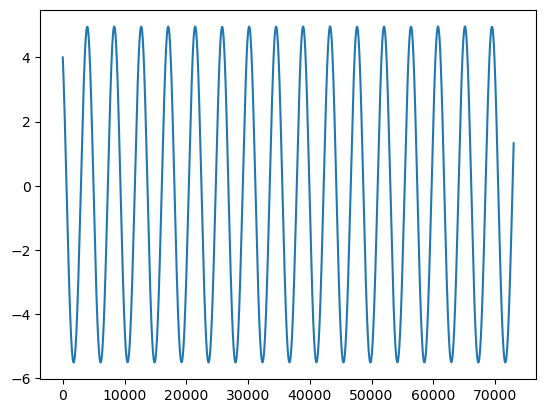

In [3]:
plt.plot(range(N), planetPosition['Jupiter'][:, 0])

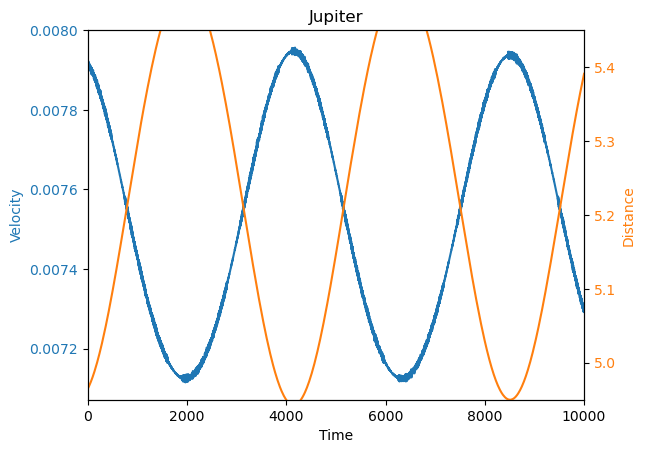

In [10]:
fig, ax1 = plt.subplots()
ax1.set_title("Jupiter")

# Plot for velocity
ax1.plot(range(N), planetVelocity["Jupiter"], color='tab:blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Velocity', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for distance
ax2 = ax1.twinx()
ax2.plot(range(N), planetDistance["Jupiter"], color='tab:orange')
ax2.set_ylabel('Distance', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.set_ylim(4.95, 5.45)

plt.xlim(0, 10000)
plt.show()

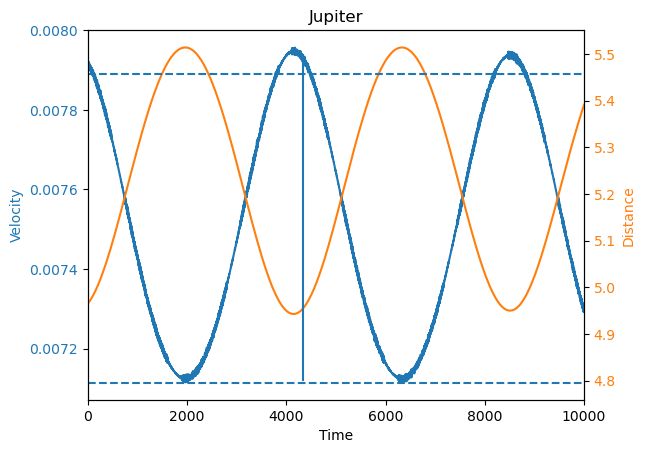

In [12]:
fig, ax1 = plt.subplots()
ax1.set_title("Jupiter")

# Plot for velocity
ax1.plot(range(N), planetVelocity["Jupiter"], color='tab:blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Velocity', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for distance
ax2 = ax1.twinx()
ax2.plot(range(N), planetDistance["Jupiter"], color='tab:orange')
ax2.set_ylabel('Distance', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.hlines([5.4570, 4.79506], 0, 10000, linestyles='--')
ax2.vlines(11.862*365.25, 4.8, 5.5)

plt.xlim(0, 10000)
plt.show()

0.0
0.0013698817792024548
0.0027397635584049096
0.004109645337607364
0.005479527116809819
0.006849408896012274
0.008219290675214729
0.009589172454417184
0.010959054233619639
0.012328936012822093
0.013698817792024549
0.015068699571227003
0.016438581350429457
0.017808463129631913
0.01917834490883437
0.02054822668803682
0.021918108467239277
0.023287990246441733
0.024657872025644186
0.02602775380484664
0.027397635584049097
0.02876751736325155
0.030137399142454006
0.03150728092165646
0.032877162700858914
0.03424704448006137
0.035616926259263826
0.03698680803846628
0.03835668981766874
0.03972657159687119
0.04109645337607364
0.0424663351552761
0.043836216934478554
0.04520609871368101
0.046575980492883466
0.04794586227208592
0.04931574405128837
0.05068562583049083
0.05205550760969328
0.05342538938889574
0.054795271168098195
0.05616515294730065
0.0575350347265031
0.058904916505705555
0.06027479828490801
0.06164468006411047
0.06301456184331292
0.06438444362251537
0.06575432540171783
0.0671242071

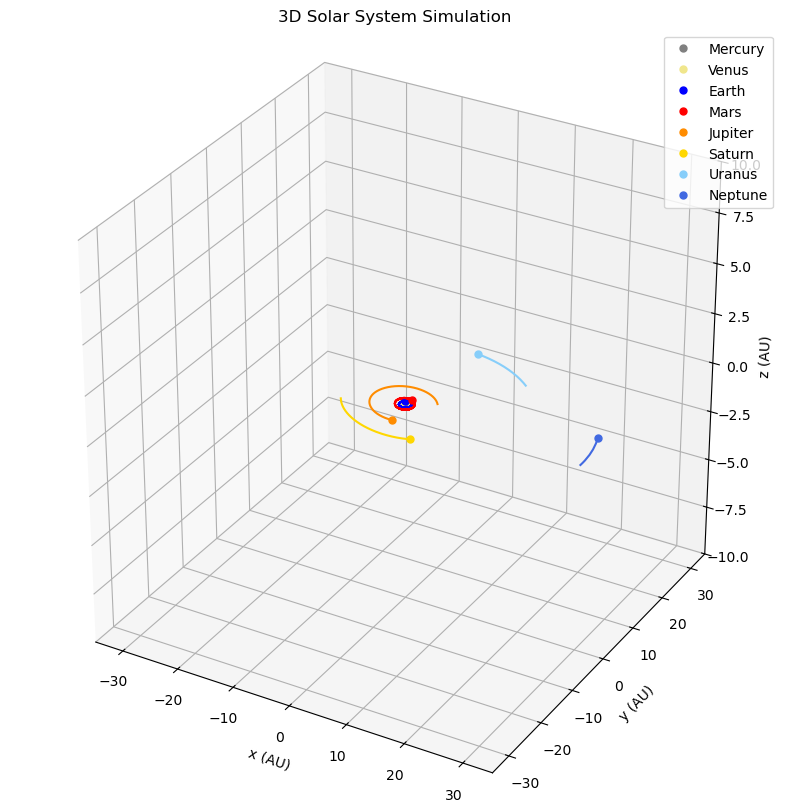

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1, 1, 1))

# creating axes for planetPositions and asteroids
plots = {}
trails = {}
for name in planetPosition.keys():
    plots[name], = ax.plot([], [], [], 'o', label=name, markersize=5, c=planetColors[name])
    trails[name], = ax.plot([], [], [], linestyle='-', c=planetColors[name])

def init():
    """parameters for 3d plot"""
    ax.set_xlim([-35, 35])
    ax.set_ylim([-35, 35])
    ax.set_zlim([-10, 10])
    ax.set_xlabel('x (AU)')
    ax.set_ylabel('y (AU)')
    ax.set_zlabel('z (AU)')
    ax.set_title('3D Solar System Simulation')
    ax.legend(loc=1)
    return [*plots.values(), *trails.values()]

def update(frame):
    print(frame / N)
    # update planetPositions and their trails
    start_idx = max(0, frame - 3000)
    for name, body in planetPosition.items():
        plots[name].set_data([body[frame, 0]], [body[frame, 1]])
        plots[name].set_3d_properties([body[frame, 2]])
        trails[name].set_data(body[start_idx:frame, 0], body[start_idx:frame, 1])
        trails[name].set_3d_properties(body[start_idx:frame, 2])
    
    return [*plots.values(), *trails.values()]

ani = FuncAnimation(fig, update, frames=range(0, N, 100), init_func=init, blit=False, interval=1)
ani.save("Figures/solar_system_3D.gif", writer=PillowWriter(fps=30))